In [79]:

from typing import Tuple, Mapping

import numpy as np
import random
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import datasets
from IPython import display

In [93]:
#функция 1
def Aklu(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Экли 
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''

    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (np.square(x) +np.square(y)))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20




def Aklu_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([((np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))* np.e**((np.cos(2*np.pi*x)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*x)+(2**(3/2))*x))/(np.sqrt(np.square(x)+np.square(y)))), (np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))*np.e**((np.cos(2*np.pi*y)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*y)+(2**(3/2))*y))/np.sqrt(np.square(x)+np.square(y))]);
Aklu(2, 3), Aklu_Grad(2, 3)

(7.9889108105187, array([0.94222736, 1.41334103]))

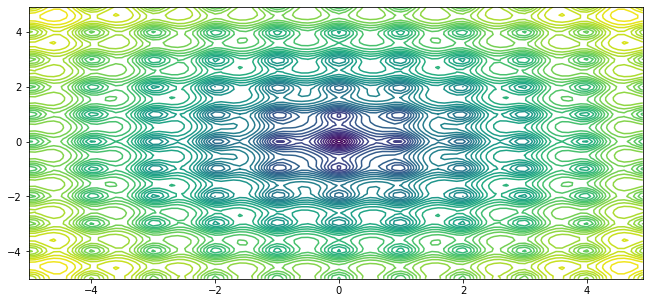

In [96]:
from matplotlib.ticker import MaxNLocator

# Изобразим функцию Экли
grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Aklu(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

# Create figure
fig, ax = plt.subplots(figsize=(11,5))
cs = ax.contour(X, Y, Z, 50)
    
plt.show()

In [82]:
#GDF
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя простейшая реализация градиентного спуска.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(100):
        # так стабильнее
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [83]:
import numba as nb
from numba import jit

In [97]:
@jit
def Aklu(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Экли 
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''

    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (np.square(x) +np.square(y)))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20



@jit
def Aklu_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([((np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))* np.e**((np.cos(2*np.pi*x)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*x)+(2**(3/2))*x))/(np.sqrt(np.square(x)+np.square(y)))), (np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))*np.e**((np.cos(2*np.pi*y)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*y)+(2**(3/2))*y))/np.sqrt(np.square(x)+np.square(y))]);
Aklu(2, 3), Aklu_Grad(2, 3)

(7.9889108105187, array([3.45162858, 1.85571757]))

In [98]:
#GDF
@jit
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя простейшая реализация градиентного спуска.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(100):
        # так стабильнее
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [99]:
#набор точек
z, y = skl.datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=0)
y = np.zeros(10)
x = np.zeros(10)
# Нам нужно сравнить размерности массивов
#y=np.reshape(y,x.shape)
for i in range(len(z)):
    x[i],y[i] = z[i];
x, y

(array([ 1.12031365, -0.49772229,  1.9263585 ,  2.49913075,  3.54934659,
         1.7373078 ,  2.91970372,  2.84382807,  0.87305123,  2.36833522]),
 array([5.75806083, 1.55128226, 4.15243012, 1.23133799, 0.6925054 ,
        4.42546234, 0.15549864, 3.32650945, 4.71438583, 0.04356792]))

In [101]:
result = my_GD(Aklu, Aklu_Grad, x, y)
gd_ind = np.argmin(result[2])
result, gd_ind

((array([ 1.06683491, -0.49040985,  1.95629455,  2.48184961,  3.54251655,
          1.78164673,  2.93981142,  2.89078028,  0.92300107,  2.32092598]),
  array([5.7990053 , 1.5401002 , 4.08251495, 1.16836885, 0.72986174,
         4.39705607, 0.09771563, 3.27848647, 4.74546932, 0.02053536]),
  array([12.19402229,  6.43093539,  9.67657333,  8.37143455, 10.14685937,
         11.75313481,  7.12950335, 10.59251262, 11.08845548,  6.99093754])),
 1)